<a href="https://colab.research.google.com/github/qedir314/Data-Science-From-Scratch/blob/main/Chapter_1_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## “Data! Data! Data!” he cried impatiently. “I can't make bricks without clay.” - Arthur Conan Doyle


In [1]:
# list of dicts. Example to data dump
users = [
  { "id": 0, "name": "Hero" },
  { "id": 1, "name": "Dunn" },
  { "id": 2, "name": "Sue" },
  { "id": 3, "name": "Chi" },
  { "id": 4, "name": "Thor" },
  { "id": 5, "name": "Clive" },
  { "id": 6, "name": "Hicks" },
  { "id": 7, "name": "Devin" },
  { "id": 8, "name": "Kate" },
  { "id": 9, "name": "Klein" }
]

In [2]:
# 'friendship' data
friendship_pairs = [
    (0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
    (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)
]

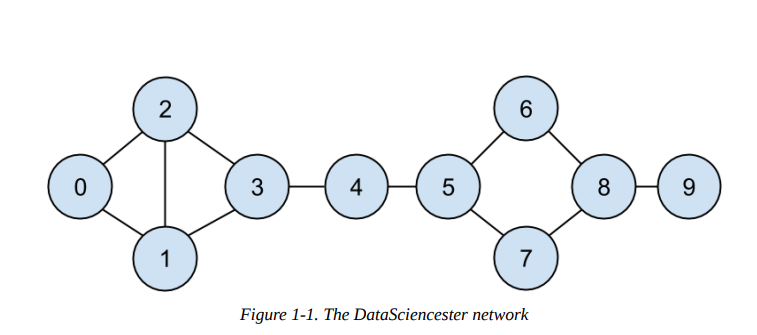

In [11]:
friendships = {user["id"]: [] for user in users}
for i,j in friendship_pairs:
    friendships[i].append(j)
    friendships[j].append(i)
friendships

{0: [1, 2],
 1: [0, 2, 3],
 2: [0, 1, 3],
 3: [1, 2, 4],
 4: [3, 5],
 5: [4, 6, 7],
 6: [5, 8],
 7: [5, 8],
 8: [6, 7, 9],
 9: [8]}

In [13]:
def number_of_friends(user):
  """How many friends does _user_ have?"""
  user_id = user["id"]
  friend_ids = friendships[user_id]
  return len(friend_ids)
total_connections = sum(number_of_friends(user) for user in users)
total_connections

24

In [15]:
num_users = len(users) # length of the users list
avg_connections = total_connections / num_users
avg_connections

2.4

In [16]:
# Create a list (user_id, number_of_friends).
num_friends_by_id = [(user["id"], number_of_friends(user)) for user in users]
num_friends_by_id.sort(key=lambda id_and_friends: id_and_friends[1], # by num_friends
reverse=True)
num_friends_by_id

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

In [17]:
def foaf_ids_bad(user):
  """foaf is short for "friend of a friend" """
  return [foaf_id for friend_id in friendships[user["id"]] for foaf_id in friendships[friend_id]]
foaf_ids_bad(users[0])

[0, 2, 3, 0, 1, 3]

In [18]:
friendships[0], friendships[1], friendships[2]

([1, 2], [0, 2, 3], [0, 1, 3])

In [19]:
from collections import Counter # not loaded by default
def friends_of_friends(user):
  user_id = user["id"]
  return Counter(foaf_id for friend_id in friendships[user_id] for foaf_id in friendships[friend_id]  if foaf_id != user_id  and foaf_id not in friendships[user_id] )

print(friends_of_friends(users[3]))

Counter({0: 2, 5: 1})


In [20]:
interests = [
  (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
  (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
  (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
  (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
  (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
  (3, "statistics"), (3, "regression"), (3, "probability"),
  (4, "machine learning"), (4, "regression"), (4, "decision trees"),
  (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
  (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
  (6, "probability"), (6, "mathematics"), (6, "theory"),
  (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
  (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
  (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
  (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [22]:
def data_scientists_who_like(target_interest):
  """Find the ids of all users who like the target interest."""
  return [user_id for user_id, user_interest in interests if user_interest == target_interest]

data_scientists_who_like("Big Data")

[0, 8, 9]

In [24]:
from collections import defaultdict
# Keys are interests, values are lists of user_ids with that interest

user_ids_by_interest = defaultdict(list)
for user_id, interest in interests:
  user_ids_by_interest[interest].append(user_id)

user_ids_by_interest

defaultdict(list,
            {'Hadoop': [0, 9],
             'Big Data': [0, 8, 9],
             'HBase': [0, 1],
             'Java': [0, 5, 9],
             'Spark': [0],
             'Storm': [0],
             'Cassandra': [0, 1],
             'NoSQL': [1],
             'MongoDB': [1],
             'Postgres': [1],
             'Python': [2, 3, 5],
             'scikit-learn': [2, 7],
             'scipy': [2],
             'numpy': [2],
             'statsmodels': [2],
             'pandas': [2],
             'R': [3, 5],
             'statistics': [3, 6],
             'regression': [3, 4],
             'probability': [3, 6],
             'machine learning': [4, 7],
             'decision trees': [4],
             'libsvm': [4],
             'C++': [5],
             'Haskell': [5],
             'programming languages': [5],
             'mathematics': [6],
             'theory': [6],
             'Mahout': [7],
             'neural networks': [7, 8],
             'deep learning': 

In [25]:
# Keys are user_ids, values are lists of interests for that user_id.
interests_by_user_id = defaultdict(list)
for user_id, interest in interests:
  interests_by_user_id[user_id].append(interest)

interests_by_user_id

defaultdict(list,
            {0: ['Hadoop',
              'Big Data',
              'HBase',
              'Java',
              'Spark',
              'Storm',
              'Cassandra'],
             1: ['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres'],
             2: ['Python',
              'scikit-learn',
              'scipy',
              'numpy',
              'statsmodels',
              'pandas'],
             3: ['R', 'Python', 'statistics', 'regression', 'probability'],
             4: ['machine learning', 'regression', 'decision trees', 'libsvm'],
             5: ['Python',
              'R',
              'Java',
              'C++',
              'Haskell',
              'programming languages'],
             6: ['statistics', 'probability', 'mathematics', 'theory'],
             7: ['machine learning',
              'scikit-learn',
              'Mahout',
              'neural networks'],
             8: ['neural networks',
              'deep learning',
       

In [26]:
def most_common_interests_with(user):
  return Counter(interested_user_id for interest in interests_by_user_id[user["id"]] for interested_user_id in user_ids_by_interest[interest] if interested_user_id != user["id"])

most_common_interests_with(users[0])

Counter({9: 3, 8: 1, 1: 2, 5: 1})

In [30]:
salaries_and_tenures = [
    (83000, 8.7), (88000, 8.1),
    (48000, 0.7), (76000, 6),
    (69000, 6.5), (76000, 7.5),
    (60000, 2.5), (83000, 10),
    (48000, 1.9), (63000, 4.2)
]

salaries = []
tenures = []
for salary, tenure in salaries_and_tenures:
  salaries.append(salary)
  tenures.append(tenure)

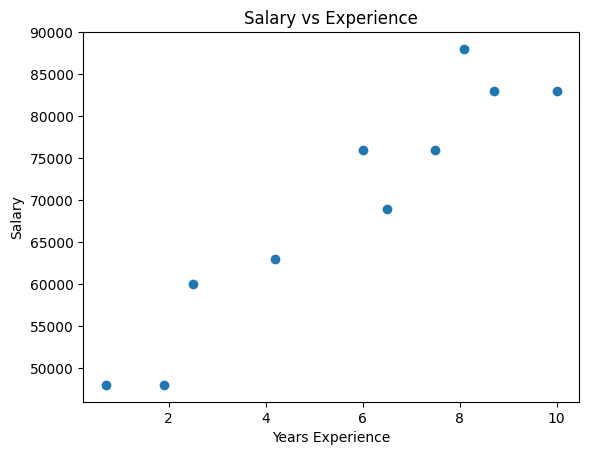

In [34]:
import matplotlib.pyplot as plt

plt.scatter(tenures, salaries)
plt.title("Salary vs Experience")
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.show()

In [36]:
# Keys are years, values are lists of the salaries for each tenure.
salary_by_tenure = defaultdict(list)
for salary, tenure in salaries_and_tenures:
  salary_by_tenure[tenure].append(salary)
# Keys are years, each value is average salary for that tenure.
average_salary_by_tenure = {
    tenure: sum(salaries) / len(salaries) for tenure, salaries in salary_by_tenure.items()
}

average_salary_by_tenure

{8.7: 83000.0,
 8.1: 88000.0,
 0.7: 48000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 2.5: 60000.0,
 10: 83000.0,
 1.9: 48000.0,
 4.2: 63000.0}

In [37]:
def tenure_bucket(tenure):
  if tenure < 2:
    return "less than two"
  elif tenure < 5:
    return "between two and five"
  else:
    return "more than five"

In [38]:
# Keys are tenure buckets, values are lists of salaries for that bucket.
salary_by_tenure_bucket = defaultdict(list)
for salary, tenure in salaries_and_tenures:
  bucket = tenure_bucket(tenure)
  salary_by_tenure_bucket[bucket].append(salary)

salary_by_tenure_bucket

defaultdict(list,
            {'more than five': [83000, 88000, 76000, 69000, 76000, 83000],
             'less than two': [48000, 48000],
             'between two and five': [60000, 63000]})

In [39]:
# Keys are tenure buckets, values are average salary for that bucket.
average_salary_by_bucket = {
    tenure_bucket: sum(salaries) / len(salaries) for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

average_salary_by_bucket

{'more than five': 79166.66666666667,
 'less than two': 48000.0,
 'between two and five': 61500.0}

In [40]:
def predict_paid_or_unpaid(years_experience):
  if years_experience < 3.0:
    return "paid"
  elif years_experience < 8.5:
    return "unpaid"
  else:
    return "paid"

In [42]:
print(interests)

[(0, 'Hadoop'), (0, 'Big Data'), (0, 'HBase'), (0, 'Java'), (0, 'Spark'), (0, 'Storm'), (0, 'Cassandra'), (1, 'NoSQL'), (1, 'MongoDB'), (1, 'Cassandra'), (1, 'HBase'), (1, 'Postgres'), (2, 'Python'), (2, 'scikit-learn'), (2, 'scipy'), (2, 'numpy'), (2, 'statsmodels'), (2, 'pandas'), (3, 'R'), (3, 'Python'), (3, 'statistics'), (3, 'regression'), (3, 'probability'), (4, 'machine learning'), (4, 'regression'), (4, 'decision trees'), (4, 'libsvm'), (5, 'Python'), (5, 'R'), (5, 'Java'), (5, 'C++'), (5, 'Haskell'), (5, 'programming languages'), (6, 'statistics'), (6, 'probability'), (6, 'mathematics'), (6, 'theory'), (7, 'machine learning'), (7, 'scikit-learn'), (7, 'Mahout'), (7, 'neural networks'), (8, 'neural networks'), (8, 'deep learning'), (8, 'Big Data'), (8, 'artificial intelligence'), (9, 'Hadoop'), (9, 'Java'), (9, 'MapReduce'), (9, 'Big Data')]


In [46]:
words_and_counts = Counter(word for user, interest in interests for word in interest.lower().split())
for word, count in words_and_counts.most_common():
  if count > 1:
    print(word, count)

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2
